# Data
The original dataset consists of sales numbers of video games until 2016 webscraped from the website [VGchartz](https://bit.ly/3rmrGlt) by [Gregory Smithy](https://www.kaggle.com/gregorut)  and was further expanded with data about critics numbers webscraped from [Metacritics](https://bit.ly/3ts9V6J) by [Rush Kirubi](https://www.kaggle.com/rush4ratio). <br>
The dataset itself is from [kaggle](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings) and has following fields: <br>

| field        | description 
| -----------  | ------ 
| Rank         | Ranking of overall sales 
| Name         | The games name 
| Platform     | Platform of the games release (i.e. PC,PS4, etc.) 
| Year_of_Release| Year of the game's release 
| Genre        | Genre of the game 
| Publisher    | Publisher of the game 
| NA_Sales     | Sales in North America (in millions) |
| EU_Sales     | Sales in Europe (in millions) |
| JP_Sales     | Sales in Japan (in millions) |
| Other_Sales  | Sales in the rest of the world (in millions) |
| Global_Sales | Total worldwide sales. |
| Critic_Score | Aggregate score compiled by Metacritic staff |
| Critic_Count | The number of critics used in coming up with the Criticscore |
| User_Score | Score by Metacritic's subscribers |
| User_Count | Number of users who gave the userscore |
| Developer | Party responsible for creating the game |
| Rating | The [ESRB](https://www.esrb.org/) ratings: A rating for age recommendations |

# Imports

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np

import altair as alt
from altair_data_server import data_server

import ipywidgets as widgets

# Load Data
Following 2 cells load the dataset and clean it. Since only the features regarding the critic-scores are missing values, we use the uncleaned dataset(data) for graphs regarding sales and the cleaned version (c_data) for graphs regarding critic scores.

In [2]:
# we load the Video_Game_Sales dataset with data_server, to process the large amount of data
alt.data_transformers.enable('data_server')
data = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')
original_len = len(data)
print(f'The dataset has {len(data)} entries')

The dataset has 16719 entries


# Clean Data

In [3]:
# drop entries with invalid entries for Year of release
data = data.drop(data[data.Year_of_Release > 2016].index)
data = data.drop(data[data.Year_of_Release.isnull()].index)
# since some string values landed in User_Score, replace them with nan
data.User_Score[data.User_Score == "tbd"] = np.nan
data['User_Score'] = pd.to_numeric(data['User_Score'], downcast="float")
#fill in NaN values with average for User_Score, Critic_Score
data.User_Score.fillna(value=np.around(data.User_Score.median(),2), inplace=True)
data.Critic_Score.fillna(value=np.around(data.Critic_Score.median(),2), inplace=True)
data.User_Count.fillna(np.around(data.User_Count.median(),2), inplace=True)
data.Critic_Count.fillna(np.around(data.Critic_Count.median(),2), inplace=True)
#data.Developer.fillna(value="nan", inplace=True)
#data.Publisher.fillna(value="nan", inplace=True)
#data.Rating.fillna(value="Nan", inplace=True)
#data.User_Score.fillna(value=data.User_Score.mean(), inplace=True)
# clean up data
c_data = data.copy()
c_data = c_data.dropna()
# User_Score's datatype is object, but we want it to be float!
# --> clean User_Score

print(f'The dataset has {len(data)} entries, dropped {original_len-len(data)}.')
print(f'The cleaned dataset has {len(c_data)} entries, dropped {original_len-len(c_data)}.')

The dataset has 16446 entries, dropped 273.
The cleaned dataset has 9766 entries, dropped 6953.


/tmp/ipykernel_11907/1249799491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.User_Score[data.User_Score == "tbd"] = np.nan


# Histograms
To look at the distribution of the data in respect to each feature, following histograms can be printed:

In [4]:
@widgets.interact(x = ["Platform:N", "Year_of_Release:O", 'Genre:N', "Global_Sales:Q", "NA_Sales:Q", "EU_Sales:Q", "JP_Sales:Q", "Other_Sales:Q",
                      "Rating:N", "Critic_Score:Q", "User_Score:Q", "Critic_Count:Q", "User_Count:Q"], 
                  to_bin=[False, True],
                  scale=["linear", "log"],
                  bin_size = widgets.IntSlider())
def show_plot(x, to_bin, scale, bin_size):
    # You have to return the chart to make it visible.
    return alt.Chart(data).mark_bar().encode(
    alt.X(x, bin=alt.Bin(step=bin_size) if to_bin else False),
    alt.Y('count()', scale=alt.Scale(type=scale))
    ).properties(title=f"Histogramm of {x[:-2]}").interactive()

interactive(children=(Dropdown(description='x', options=('Platform:N', 'Year_of_Release:O', 'Genre:N', 'Global…

Looking at the histograms, all features are mostly skewed. <br>
**_Sales**: 
Especially the features concerning the sales are heavily scewed, indicating that we have a few games that are sold very often (10-30 million), while most games are sold between 0-1 million times. <br>
**Platform:** The most dominant platform is PS2 and DS regarding games count, while "old-gen" consoles like PS3, Wii, X360 take the middle-field. Old platforms like the N64, NES and new ones like the PS4 and the XOne have few counts. <br>
**Year of Release**: Most games were released in the year from 2002 to 2011. <br>
**Genre**: The most commmon genre by far are action and Sports, while the other genre are more equal distributed. Only puzzle and strategy are not that common. <br>
**Rating**: For rating there are nearly a half missing values, the most common one are E(everyone) and T(teen). <br>
**_Score and _Count**: The most common value is the median, hence we introduced quite a bias for the histogramm. This is because of a lot of missing values for these features and the reason why we will use the "c_data" dataset for plots that focus on these features. <br>
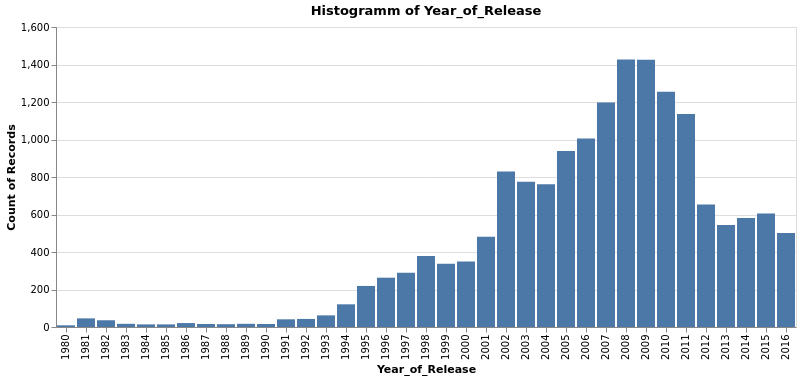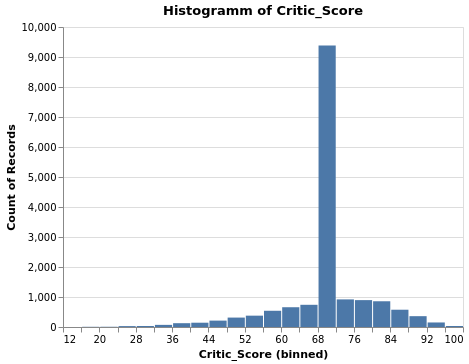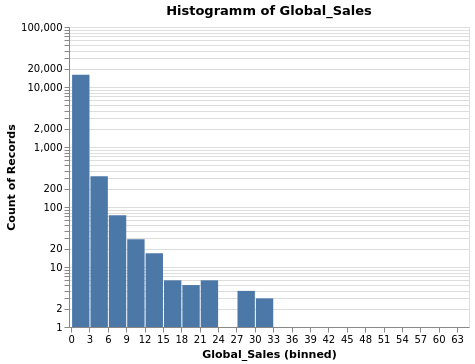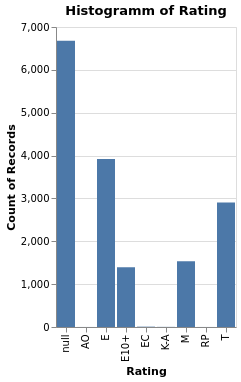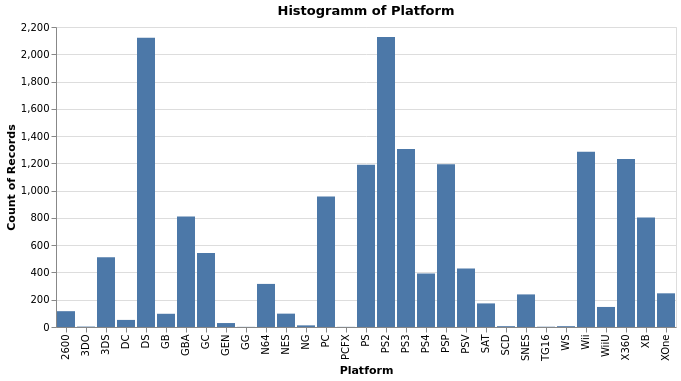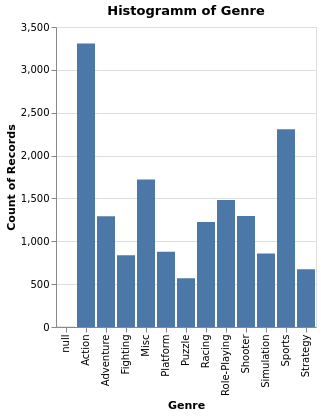

In [5]:
alt.Chart(data).mark_bar(width=20).encode(
    alt.Y('count()', scale=alt.Scale(type='linear')),
    alt.X("Publisher:N", bin=False, sort= '-y'),
).properties(width=alt.Step(25), title="Histogramm of Publisher").configure_title(anchor="start")

alt.Chart(...)

**Publisher**: Again the distribution is heavily skewed, with a few well-known names in the industrie at the top.

In [6]:
uniq = c_data.Developer.unique()
c = []
for u in uniq:
    c.append((u, c_data.Developer[c_data.Developer == u].count()))
c_df = pd.DataFrame(c).sort_values(1, ascending=False)
alt.Chart(c_df[:100]).mark_bar(width=20).encode(
    alt.Y('1:Q', scale=alt.Scale(type='linear'), title= "Count of Records"),
    alt.X("0:N", bin=False, sort= '-y', title= "Developer"),
).properties(width=alt.Step(25), title="Histogramm of Developer").configure_title(anchor="start")

alt.Chart(...)

**Developer**: For the developer it is the same as for the publisher, but the distribution doesn't drop down to nearly zero as fast compared to the publisher. One reason could be that most publisher have multiple developer working for them. For example take the publisher Electronic Arts, who has 4 different developer teams (EA Sports, EA Canada, EA Tiburon, Electronic Arts,..) as in-house developer.

# Sales overview
Get a overview of the sales, especially how the global sales is spread over the years and which platform/games are most sold.

In [7]:
uniq = c_data.Developer.unique()
c = []
for u in uniq:
    c.append((u, c_data.Global_Sales[c_data.Developer == u].sum()))
c_df = pd.DataFrame(c).sort_values(1, ascending=False)
alt.Chart(c_df[:100]).mark_bar(width=20).encode(
    alt.Y('1:Q', scale=alt.Scale(type='linear'), title = "sum of global sales"),
    alt.X("0:N", bin=False, sort= '-y', title = "Developer"),
).properties(width=alt.Step(25), title="Global Sales by Developer").configure_title(anchor="start")

alt.Chart(...)

Now comparing this plot to the histogram before you can clearly see that the sales per developer correlates with the number of released games, as EA Sports, EA Canada, Ubisoft for example are at the top of each graph. Nintendo is clearly an exception since the 14 most sold games are from Nintendo and the global sales sum of these 14 games is around 500 million.

In [8]:
sales_year = []
col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for year in range(1980, 2017):
    sales = data[col][data['Year_of_Release']==year].sum()
    year = pd.Series({"year": year})
    sales_year.append(pd.concat([sales, year]))
    
source = pd.DataFrame(sales_year).melt(['year'], col)

alt.Chart(source).mark_bar().encode(
    alt.X('year:O'),
    alt.Y('value:Q', title="Sales"),
    alt.Tooltip('sum(value):Q'),
    color=alt.Color('variable:N', legend=alt.Legend(title="Sales per region"))
).properties(title="Sales per region by year")

alt.Chart(...)

Clearly the video game market is increasingly growing, especially the games from the year 2006-2011 have the biggest global sales compared to the year 2012-2016, which indicates that old games stay relevant at least for a few years. Especially the Wii-platform was popular in these years which is also noticable in the following chart. Also the above Graph follows the shape of the Histogram of Year_of_Release, meaning again that more games released also means more sales. <br>
Furter visible is the market-share with north-america being the biggest market, followed by Europe and Japan. The market in other regions seem to grow but is comparibly small. The drop of sales at the more recent years could be explained by old games or "classic" games being more popular and usually it takes some years for a game to establish as a "classic" game.

In [9]:
idx = []
for year in range(2006,2011):
    idx.append(data[data["Year_of_Release"]==year][['Global_Sales']].idxmax().values[0])
data.iloc[idx]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E


# What are the most-sold games globally?

In [10]:
data_sorted = data.sort_values('Global_Sales', ascending=False)
data_sorted.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,22.0,7.5,24.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,22.0,7.5,24.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,22.0,7.5,24.0,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,22.0,7.5,24.0,NaN,NaN


In the tabular representation, it can already be seen, that Wii Sports is the game that brought by far the most global sales. But this representation only shows the sales for each game per platform. <br>
The following chart adds the sales of the same games on different platforms:

In [11]:
Global_top = alt.Chart(data_sorted[:50]).mark_bar().encode(
    alt.X("Name:N", sort='-y'),
    alt.Y("Global_Sales:Q"),
    color=alt.Color("Platform", scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Platform")),
    tooltip = ["Name:N", "Platform:N", "Developer:N", "Global_Sales:Q"]
).properties(title='Global sales of each game until 2016'
).interactive(bind_y=False)

Global_top.configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='#2b8cbe'
)

alt.Chart(...)

Wii sports is still by far the most-sold game. The most probable explanation to its success is the fact, that it was sold in a bundle together with the Wii in all regions except in Japan. <br>
So the success of Wii Sports is in reality the success of the Wii-console, as Wii Sports itself wasn't that popular.<br>
<br>
Also GTA V is now on second place, while it wasn't even in the top 10 of the tabular representation above. In the chart it can clearly be seen that its sales are only high, if different platform-sales are added.

In [12]:
NA_top = alt.Chart(data_sorted[:50]).mark_bar().encode(
    alt.X("Name:N", sort='-y'),
    alt.Y("NA_Sales:Q"),
    color=alt.Color("Platform", scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Platform")),
    tooltip = ["Name:N", "Platform:N", "Developer:N", "NA_Sales:Q"]
).properties(title='North American sales of each game until 2016'
).interactive(bind_y=False)

NA_top.configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='#2b8cbe'
)

alt.Chart(...)

Nintendo still manages to beat all other american games with Wii Sports, Super Mario Bros and Duck Hunt in North America.<br>
--> This is a good example of the success of japanese games and electronics!

In [13]:
EU_top = alt.Chart(data_sorted[:50]).mark_bar().encode(
    alt.X("Name:N", sort='-y'),
    alt.Y("EU_Sales:Q"),
    color=alt.Color("Platform", scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Platform")),
    tooltip = ["Name:N", "Platform:N", "Developer:N", "EU_Sales:Q"]
).properties(title='European sales of each game until 2016'
).interactive(bind_y=False)

EU_top.configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='#2b8cbe'
)

alt.Chart(...)

Wii Sports is also on the top in Europe. Generally, the european sales are similar to the global sales with a few small differences, e.g. that shooter games seem to be more popular in Europe.

In [14]:
JP_top = alt.Chart(data_sorted[:50]).mark_bar().encode(
    alt.X("Name:N", sort='-y'),
    alt.Y("JP_Sales:Q"),
    color=alt.Color("Platform", scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Platform")),
    tooltip = ["Name:N", "Platform:N", "Developer:N", "JP_Sales:Q"]
).properties(title='Japanese sales of each game until 2016'
).interactive(bind_y=False)

JP_top.configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='#2b8cbe'
)

alt.Chart(...)

Interestingly, the japanese top game-sales look very different from North America, Europe as well as the global sales. This is most likely due to cultural differences and different marketing strategies and thus a very different market. Also, the top 11 games were all developed by a japanese company (Nintendo).<br> 
Furthermore it can be seen, that the Pokemon games are especially popular in Japan, with 5 out of the top 10 games being Pokemon games.

In [15]:
Other_top = alt.Chart(data_sorted[:50]).mark_bar().encode(
    alt.X("Name:N", sort='-y'),
    alt.Y("Other_Sales:Q"),
    color=alt.Color("Platform", scale=alt.Scale(scheme='tableau20'), legend=alt.Legend(title="Platform")),
    tooltip = ["Name:N", "Platform:N", "Developer:N", "Other_Sales:Q"]
).properties(title='Other sales of each game until 2016'
).interactive(bind_y=False)

Other_top.configure_title(
    fontSize=20,
    font='Courier',
    anchor='middle',
    color='#2b8cbe'
)

alt.Chart(...)

In the other regions not belonging to one of the three big markets, GTA San Andreas seems to be the most popular game. Here too, shooter games are high in the list, with the occasional nintendo-classic game in between.

## Overview and Comparison

In [16]:
NA_top = NA_top.properties(height=200, width=600)
EU_top = EU_top.properties(height=200, width=600)
JP_top = JP_top.properties(height=200, width=600)
Other_top = Other_top.properties(height=200, width=600)

c1 = alt.vconcat(NA_top, EU_top)
c2 = alt.vconcat(JP_top, Other_top)

alt.hconcat(c1, c2)

alt.HConcatChart(...)

# Find Correlations
The goal is to find correlations between differnet features, at first particulary in the context of global and local sales.

In [17]:
@widgets.interact(x = ["Platform:N", "Year_of_Release:O", 'Genre:N', "Global_Sales:Q", "NA_Sales:Q", "EU_Sales:Q", "JP_Sales:Q", 
                       "Other_Sales:Q", "Rating:N", "Critic_Score:Q", "User_Score:Q"], 
                  y = ["Platform:N", "Year_of_Release:O", 'Genre:N', "Global_Sales:Q", "NA_Sales:Q", "EU_Sales:Q", "JP_Sales:Q", 
                       "Other_Sales:Q", "Rating:N", "Critic_Score:Q", "User_Score:Q"],
                  marker_size = ["sum(Global_Sales):Q", "sum(NA_Sales):Q", "sum(EU_Sales):Q", "sum(JP_Sales):Q" , "sum(Other_Sales):Q"])
def show_plot(x,y,marker_size):
    
    return alt.Chart(data).mark_circle().encode(
        alt.X(x, scale=alt.Scale(zero=False)),
        alt.Y(y, scale=alt.Scale(zero=False)),
        size = marker_size,
        opacity = alt.value(0.8)
        
).configure_axis(grid=True).interactive()

interactive(children=(Dropdown(description='x', options=('Platform:N', 'Year_of_Release:O', 'Genre:N', 'Global…

**Platform vs. Year(global)**: In this graph you can nicely see that the platform are time bound as each platform was released in a certain year and got superseded by another platform (PS, PS2, PS3, PS4) after a certain time period. An exception is the PC, where the global sales are more constant but rather small compared to the console market. <br>
**Platform vs. Genre(all)**: Looking for a clue what leads to a high global sale, we can see following combinations:
  * Wii and Sports, Misc
  * X360 and Shooter, Action
  * PS2, PS3 and Action 
  
The sum of the global sales have around the same scheme as the sales in EU, NA and other countries. Only in Japan the Genre Role-Playing seems to dominates on nearly all platforms. <br>
**EU_Sales vs. NA_Sales(EU/NA)**: There could be a linear correlation altough very noisy, but especially if you zoom in there are data-points that line up nicely. <br>
**NA_Sales vs. Global_Sales(global)**: There is certainly a linear correlation. <br>
**EU_Sales vs. Global_Sales(global)**: Also a linear correlation but mayber weaker then NA_Sales vs. Global_Sales. <br>
**JP_Sales vs. Global_Sales(global)**: This looks more like a strong non-linear relationship since mostly a game has high global sales or high sales in Japan, but not both. An exception are the most popular games. They seem to sell good both in Japan as well as global.

In [18]:
sales_platform = []
col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
platforms = data['Platform'].unique()
for platform in platforms:
    sales = data[col][data['Platform']==platform].sum()
    platform = pd.Series({"platform": platform})
    sales_platform.append(pd.concat([sales, platform]))
    
source = pd.DataFrame(sales_platform).melt(['platform'], col)

alt.Chart(source).mark_bar().encode(
    alt.Y('platform:O'),    # just changed from x= to this form so we have some nice axis labels
    alt.X('value:Q', title="Sales"), # not quite sure if the labels are fitting!
    color=alt.Color('variable:N', legend=alt.Legend(title="Sales per region"))
)

alt.Chart(...)

In [19]:
critic_score_platform = []
col = ['Critic_Score']
platforms = c_data['Platform'].unique()
for platform in platforms:
    weights = c_data.Critic_Count[c_data['Platform']==platform] # get the User Counts as weights
    Critic_Score = c_data[col][c_data['Platform']==platform] # get all relevant Critic scores
    Critic_Score = (Critic_Score.multiply(weights, axis="index")/data.Critic_Count.sum()).mean()
    platform = pd.Series({"platform": platform})
    critic_score_platform.append(pd.concat([Critic_Score, platform]))
    
source = pd.DataFrame(critic_score_platform).melt(['platform'], col)

alt.Chart(source).mark_bar().encode(
    alt.Y('platform:O'),    # just changed from x= to this form so we have some nice axis labels
    alt.X('value:Q', title="Critic_Score"),
).properties(title="critic score per platform")

alt.Chart(...)

In [20]:
user_score_platform = []
col = ['User_Score']
platforms = c_data['Platform'].unique()
for platform in platforms:
    weights = c_data.User_Count[c_data['Platform']==platform] # get the User Counts as weights
    User_Score = c_data[col][c_data['Platform']==platform] # get all relevant User scores
    User_Score = (User_Score.multiply(weights, axis="index")/data.User_Count.sum()).mean() # calculate the weighted mean with the weights averaged over the
    platform = pd.Series({"platform": platform})                                           # the sum of the whole dataset
    user_score_platform.append(pd.concat([User_Score, platform]))
    
source = pd.DataFrame(user_score_platform).melt(['platform'], col)

alt.Chart(source).mark_bar().encode(
    alt.Y('platform:O'),    # just changed from x= to this form so we have some nice axis labels
    alt.X('value:Q', title="User_Score weighted by User_Count"),
).properties(title="user_score per platform")

alt.Chart(...)

# Clustering with feature reduction

Finally, we want to cluster our data. Since we have multidimensional data, we perform feature reduction using t-SNE or PCA respectively to cast the data onto 2 dimensions. We consider the features EU/NA/FP/Other Sales, since they are the only numerical features. As categories for the clusters, we selected Genre and Platform.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

features= ["EU_Sales", "NA_Sales", "JP_Sales", "Other_Sales"]
num_data = data[features].values

num_data = StandardScaler().fit_transform(num_data)

In [22]:
@widgets.interact(method = ["pca", "t-sne"], category = ["Genre", "Platform"])

def show_plot(method, category):
    if method == "pca":
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(num_data)
        principalDf = pd.DataFrame(data = principalComponents, columns = ['comp1', 'comp2'])
        data_col = data[[category, "Name"]+features]
        principalDf.reset_index(drop=True, inplace=True)
        data_col.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([principalDf, data_col], axis = 1)
    elif method == "t-sne":
        tsne = TSNE(n_components=2)
        tsneComp = tsne.fit_transform(num_data)
        tsneDf = pd.DataFrame(data = tsneComp, columns = ['comp1', 'comp2'])
        data_col = data[[category, "Name"]+features]
        tsneDf.reset_index(drop=True, inplace=True)
        data_col.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([tsneDf, data_col], axis = 1)
    
    selection = alt.selection_multi(fields=[f'{category}'])
    color = alt.condition(selection,alt.Color(f'{category}:N', legend=None),alt.value('lightgray'))
    opacity = alt.condition(selection, alt.value(0.7), alt.value(0))
    
    scatter = alt.Chart(finalDf).mark_circle(size=60).encode(
        x="comp1",
        y="comp2",
        color=color,
        opacity=opacity,
        tooltip= ["Name:N"]+features
        ).interactive()
    
    legend = alt.Chart(finalDf).mark_point().encode(
        y=alt.Y(f'{category}:N', axis=alt.Axis(orient='right')),
        color=color
    ).add_selection(selection)
    return scatter | legend

interactive(children=(Dropdown(description='method', options=('pca', 't-sne'), value='pca'), Dropdown(descript…

## First insights
It is easy to see that the second component of PCA separates the Japanese game market from the Western market, which indicates a different purchase and gaming behaviour based on the players' cultures. Positive values lean to higher market share in Japan and negative values to higher market share in the Western market. The first component in the meanwhile shows the magnitude of sales. Lastly, it is clearly visible that European and Northern American gamers have similar preferences in games and the market is very similar.

After playing around with the selection tool, we found following deeper insights:

- num_data = data[["EU_Sales", "NA_Sales", "JP_Sales", "Other_Sales"]], pca, Genre <br>
    comp2 seems to split the data according to their sales, positive means more sales in JP and negative means more Sales in NA/EU (East vs. West) <br>
    further away from 0 -> more sales <br>
    e.g.: X360 is primarily western oriented, while 3DS caters more to the Japan market. <br>
    role-playing seems more dominant in Japan, while shooter are more dominant on the western market <br>


In [23]:
@widgets.interact(plot = ["Genres and Cultures", "3DS vs. X360"])

def show_plot(plot):
    if plot == "Genres and Cultures":
        category = "Genre"
    if plot == "3DS vs. X360":
        category = "Platform"
        
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(num_data)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['comp1', 'comp2'])
    data_col = data[[category, "Name"]+features]
    principalDf.reset_index(drop=True, inplace=True)
    data_col.reset_index(drop=True, inplace=True)
    finalDf = pd.concat([principalDf, data_col], axis = 1)
    
    if plot == "Genres and Cultures":
        finalDf = finalDf.loc[(finalDf["Genre"] == "Shooter") | (finalDf["Genre"] == "Role-Playing")]
    if plot == "3DS vs. X360":
        finalDf = finalDf.loc[(finalDf["Platform"] == "3DS") | (finalDf["Platform"] == "X360")]
        
    color = alt.Color(f'{category}:N', legend=None)
    
    scatter = alt.Chart(finalDf).mark_circle(size=60).encode(
        x="comp1",
        y="comp2",
        color=color,
        tooltip= ["Name:N"]+features
        ).interactive()
    
    legend = alt.Chart(finalDf).mark_point().encode(
        y=alt.Y(f'{category}:N', axis=alt.Axis(orient='right')),
        color=color
    )
    return scatter | legend

interactive(children=(Dropdown(description='plot', options=('Genres and Cultures', '3DS vs. X360'), value='Gen…

In [24]:
from sklearn.cluster import KMeans
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import manifold

@widgets.interact(dimension = ["pca", "t-sne"],
                  clustering = ["k-means", "decision_trees"],
                  target_dt = ["Genre", "Platform", "Rating", "Global_Sales"],
                  n_cluster_kmeans = widgets.BoundedIntText(min=2,max=7))
def show_plot(dimension, clustering, target_dt, n_cluster_kmeans): 
    
    features= ["Platform", "Year_of_Release", 'Genre', "Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Rating", "Critic_Score",
           "User_Score", "Critic_Count", "User_Count"] # excluded Name, Publisher, Developer
    a_features= ["Platform:N", "Year_of_Release:O", 'Genre:N', "Global_Sales:Q", "NA_Sales:Q", "EU_Sales:Q", "JP_Sales:Q", "Other_Sales:Q", "Rating:N", "Critic_Score:Q",
           "User_Score:Q", "Critic_Count:Q", "User_Count:Q"]
    
    if clustering == "k-means":
        encoded_data = pd.get_dummies(data[features])
        pred = KMeans(n_clusters=n_cluster_kmeans, random_state=7).fit_predict(encoded_data)
        r_data = data
    
    elif clustering == "decision_trees":
        
        encoded_data = pd.get_dummies(c_data[[x for x in features if x!=target_dt]])
        instance = DecisionTreeClassifier()
        r = instance.fit(encoded_data, c_data[target_dt])
        pred = instance.predict(encoded_data)
        r_data = c_data
        
    if dimension == "pca":
        pca = PCA(n_components=2, random_state=7)
        principalComponents = pca.fit_transform(encoded_data)
        principalDf = pd.DataFrame(data = principalComponents, columns = ['comp1', 'comp2'])
        data_col = r_data[["Name"]+features]
        principalDf.reset_index(drop=True, inplace=True)
        data_col.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([principalDf, data_col], axis = 1)
        
    elif dimension == "t-sne":
        tsne = TSNE(n_components=2, random_state=7, n_jobs=4)
        tsneComp = tsne.fit_transform(encoded_data)
        tsneDf = pd.DataFrame(data = tsneComp, columns = ['comp1', 'comp2'])
        data_col = r_data[["Name"]+features]
        tsneDf.reset_index(drop=True, inplace=True)
        data_col.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([tsneDf, data_col], axis = 1)    
        
    finalDf["predict"]=pred
    
    selection = alt.selection_multi(fields=["predict"])
    color = alt.condition(selection,alt.Color("predict:N", legend=None),alt.value('lightgray'))
    opacity = alt.condition(selection, alt.value(0.7), alt.value(0))
        
    scatter = alt.Chart(finalDf).mark_circle(size=60).encode(
        x="comp1",
        y="comp2",
        color=color,
        opacity=opacity,
        tooltip= ["Name:N"]+a_features
        ).interactive()
    
    legend = alt.Chart(finalDf).mark_point().encode(
        y=alt.Y('predict:N', axis=alt.Axis(orient='right')),
        color=color
    ).add_selection(selection)
    return scatter | legend

interactive(children=(Dropdown(description='dimension', options=('pca', 't-sne'), value='pca'), Dropdown(descr…

### 1. Genres of games in different countries

Due to either cultural preferences or different marketing targeting, Shooter games are prevalent in the Western market, while Role-Playing games dominate the Japanese market.

### 2. Different adaption of gaming consoles

There is a big difference in the market share of some consoles depending on the market. Particularly outstanding is the difference in adoption of the Nintendo 3DS and the Microsoft XBOX 360. This might be due to the Origin of the consoles (Japan vs. USA) or the marketing in the respective countries.